# QSAM - Exercício Prático - Final 
### Grupo 2: Elisa, Francisco, Henrique, Hernani e Rita.
## 1. Efetuar uma analise descritiva dos dados de vendas e itens para 2022.
## 2. Verificar se as vendas médias por dia da loja 616 foram superiores a 34.000€.

#### Dataset: “Dados.xls”.

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sta
from scipy import stats
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")

# 1. Efetuar uma análise descritiva dos dados de vendas e itens para 2022.

## 1.1. Carregamento do ficheiro para análise.

In [2]:
df = pd.read_excel('Dados.xlsx')

In [3]:
df

,Loja,Cidade,DATA,SUM(ITENS),SUM(VALOR)
0,261,Porto,2022-01-04,3438,6825.08
1,261,Porto,2022-01-19,3645,6614.07
2,261,Porto,2022-01-23,4432,8300.36
3,261,Porto,2022-01-28,3773,7316.09
4,261,Porto,2022-02-14,3861,7015.80
...,...,...,...,...,...
26176,1601,Lisboa,2022-10-17,3601,6106.24
26177,1601,Lisboa,2022-10-21,3865,7355.57
26178,1601,Lisboa,2022-11-23,3376,6558.53
26179,1601,Lisboa,2022-11-26,3506,7415.11


## 1.2. Verificação da integridade do conjunto de dados.

In [4]:
df.info() # verificação de valores nulos e tipo de dados adequado para cada variável.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26181 entries, 0 to 26180
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Loja        26181 non-null  int64         
 1   Cidade      26181 non-null  object        
 2   DATA        26181 non-null  datetime64[ns]
 3   SUM(ITENS)  26181 non-null  int64         
 4   SUM(VALOR)  26181 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1022.8+ KB


In [5]:
linhas_duplicadas = df.duplicated() # verificação de linhas duplicadas.
print("Número total de duplicados:", linhas_duplicadas.sum())

Número total de duplicados: 0


##### Os dados em questão apresentam integridade, uma vez que: não existem valores nulos; o tipo de dados utilizado para cada variável é o adequado; e não existem linhas duplicadas.

## 1.3. Análise descritiva dos dados para cada cidade.

#### Porto

In [6]:
df_porto = df[df['Cidade'] == 'Porto']
df_porto_filtered = df_porto[['SUM(ITENS)', 'SUM(VALOR)']]
df_porto_filtered.describe() # método 'describe()' inclui estatísticas como contagem, média, desvio padrão, mínimo, percentis e máximo para cada coluna do DataFrame.

,SUM(ITENS),SUM(VALOR)
count,6861.000000,6861.000000
mean,18611.642763,57699.891450
std,17213.409969,61835.265403
min,2.000000,3.160000
25%,3285.000000,6156.430000
50%,13623.000000,39105.330000
75%,28438.000000,86507.010000
max,120408.000000,565698.640000


In [7]:
df_porto_filtered.mode() # calculo da moda.

,SUM(ITENS),SUM(VALOR)
0,64,64.0


#### Lisboa

In [8]:
df_lisboa = df[df['Cidade'] == 'Lisboa']
df_lisboa_filtered = df_lisboa[['SUM(ITENS)', 'SUM(VALOR)']]
df_lisboa_filtered.describe() # método 'describe()' inclui estatísticas como contagem, média, desvio padrão, mínimo, percentis e máximo para cada coluna do DataFrame.

,SUM(ITENS),SUM(VALOR)
count,5590.000000,5590.000000
mean,18732.517352,58681.752540
std,17552.068015,62340.181733
min,451.000000,776.010000
25%,3039.000000,5693.697500
50%,12929.500000,36177.335000
75%,29433.250000,91049.062500
max,131491.000000,611971.250000


In [9]:
df_lisboa_filtered.mode() # calculo da moda.

,SUM(ITENS),SUM(VALOR)
0,2858.0,3057.67
1,NaN,3760.45
2,NaN,4893.68
3,NaN,4928.86
4,NaN,5541.03
5,NaN,5737.56
6,NaN,5940.61
7,NaN,6518.27
8,NaN,6764.15
9,NaN,97461.92


## 1.4. Análise exploratória e gráfica dos dados.

#### Esta análise exploratória consiste em duas partes. Na primeira parte é feita uma análise geral e gráfica entre as diversas cidades em termos de vendas de itens, faturação e número de lojas. Na segunda parte, o pricipal foco da análise exploratória e gráfica, é a comparação mais detalhada entre as duas cidades com maior número de lojas (Porto e Lisboa) em termos de vendas de itens e faturação.

### 1.4.1 Análise geral entre as diversas cidades em termos de vendas de itens, faturação e número de lojas.

### Número de lojas em cada cidade

In [10]:
lojas_por_cidade = df.groupby('Cidade')['Loja'].nunique().reset_index()
lojas_por_cidade

,Cidade,Loja
0,Aveiro,9
1,Beja,1
2,Braga,6
3,Coimbra,1
4,Faro,10
5,Lisboa,16
6,Porto,21
7,Vila Nova de Gaia,12


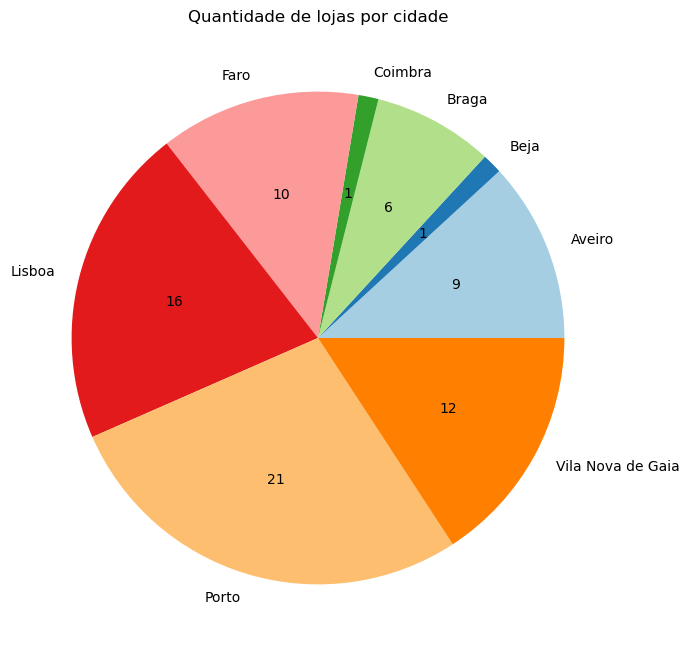

In [11]:
lojas_cidades = lojas_por_cidade['Cidade']
lojas = lojas_por_cidade['Loja']

plt.figure(figsize=(10, 8))
plt.pie(lojas, labels=lojas_por_cidade.Cidade, autopct=lambda x: '{:.0f}'.format(x*lojas.sum()/100), colors=plt.cm.Paired.colors)

plt.title('Quantidade de lojas por cidade')
plt.show()

### Total de vendas em cada cidade.

In [12]:
venda_por_cidade = df.groupby('Cidade')['SUM(ITENS)'].sum().reset_index()
venda_por_cidade

,Cidade,SUM(ITENS)
0,Aveiro,8801120
1,Beja,9915948
2,Braga,49687922
3,Coimbra,942262
4,Faro,49353891
5,Lisboa,104714772
6,Porto,127694481
7,Vila Nova de Gaia,31987073


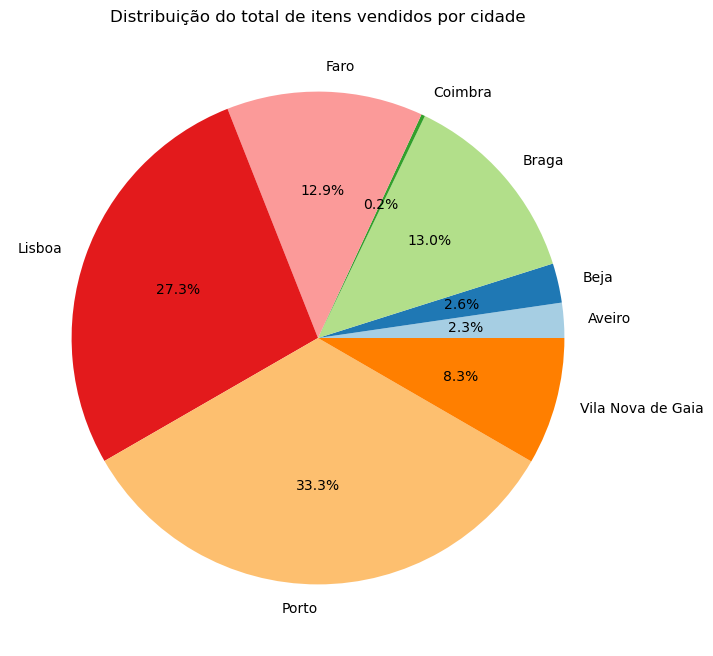

In [13]:
cidades = venda_por_cidade['Cidade']
total_itens = venda_por_cidade['SUM(ITENS)']

plt.figure(figsize=(10, 8))
plt.pie(total_itens, labels=cidades, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribuição do total de itens vendidos por cidade')
plt.show()

### Total de faturação em cada cidade.

In [14]:
faturacao_por_cidade = df.groupby('Cidade')['SUM(VALOR)'].sum().reset_index()
faturacao_por_cidade

,Cidade,SUM(VALOR)
0,Aveiro,1.713370e+07
1,Beja,3.517362e+07
2,Braga,1.680781e+08
3,Coimbra,1.631900e+06
4,Faro,1.667844e+08
5,Lisboa,3.280310e+08
6,Porto,3.958790e+08
7,Vila Nova de Gaia,9.775247e+07


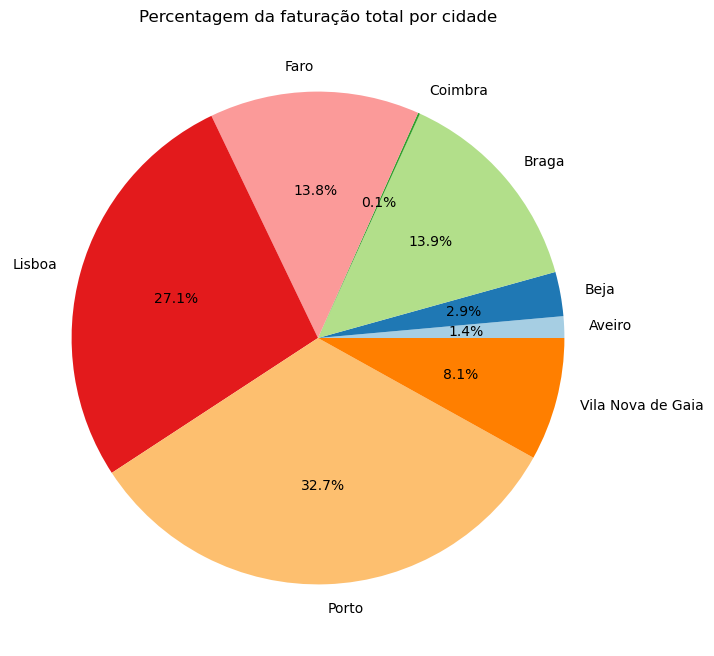

In [15]:
faturacao_cidades = faturacao_por_cidade['Cidade']
faturacao = faturacao_por_cidade['SUM(VALOR)']

plt.figure(figsize=(10, 8))
plt.pie(faturacao, labels=faturacao_cidades, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentagem da faturação total por cidade')
plt.show()

### Principais 'Insights' da análise geral entre cidades:
##### Através da análise do gráfico circular podemos constatar que a cidade do Porto tem o maior número de lojas no país (21 lojas), seguida por Lisboa com 16 lojas e de Vila Nova de Gaia com 12 lojas.  
##### Coimbra e Beja tem o menor número de lojas, apenas uma loja em cada uma destas cidades.
##### Mais de metade das lojas localizam-se na zona norte do país (Porto, V.N. Gaia, Braga, Aveiro).
##### Relativamente aos valores de vendas e faturação, como seria expectável Porto e Lisboa encontram-se, respetivamente, na primeira e segunda posições, com mais de metade do total de itens vendidos e da soma do valor das vendas.
##### Braga e Faro apesar de terem menor número de lojas do que Aveiro e V.N. Gaia, apresentaram mesmo assim, maiores volumes de vendas e faturação em relação a estas duas cidades.
##### De salientar que Beja com apenas uma loja teve maiores vendas e principalmente maior volume de faturação em relação a Aveiro (que conta com 8 lojas).
##### Coimbra com apenas uma loja, é a cidade que apresenta menores números de itens vendidos e da soma do valor das vendas, abaixo de 0,3%, respetivamente.

### 1.4.2. Análise exploratória e gráfica entre Porto e Lisboa em termos de vendas de itens e faturação.

### Top 5 lojas que mais venderam (itens) em cada cidade.

#### Porto

In [16]:
top5_mais_vendas_porto= df_porto.groupby(['Loja'])['SUM(ITENS)'].sum().sort_values(ascending=False).head(5)
top5_mais_vendas_porto=top5_mais_vendas_porto.reset_index()
top5_mais_vendas_porto['Loja'] = top5_mais_vendas_porto['Loja'].astype(str)
top5_mais_vendas_porto=top5_mais_vendas_porto.sort_values(by='SUM(ITENS)', ascending=True)
top5_mais_vendas_porto

,Loja,SUM(ITENS)
4,783,10132621
3,321,13783868
2,871,15738221
1,911,17598425
0,164,18410762


#### Lisboa

In [17]:
top5_mais_vendas_lisboa= df_lisboa.groupby(['Loja'])['SUM(ITENS)'].sum().sort_values(ascending=False).head(5)
top5_mais_vendas_lisboa = top5_mais_vendas_lisboa.reset_index()
top5_mais_vendas_lisboa['Loja'] = top5_mais_vendas_lisboa['Loja'].astype(str)
top5_mais_vendas_lisboa=top5_mais_vendas_lisboa.sort_values(by='SUM(ITENS)', ascending=True)
top5_mais_vendas_lisboa

,Loja,SUM(ITENS)
4,65,10150439
3,406,11003901
2,482,11530173
1,425,12961877
0,976,20968073


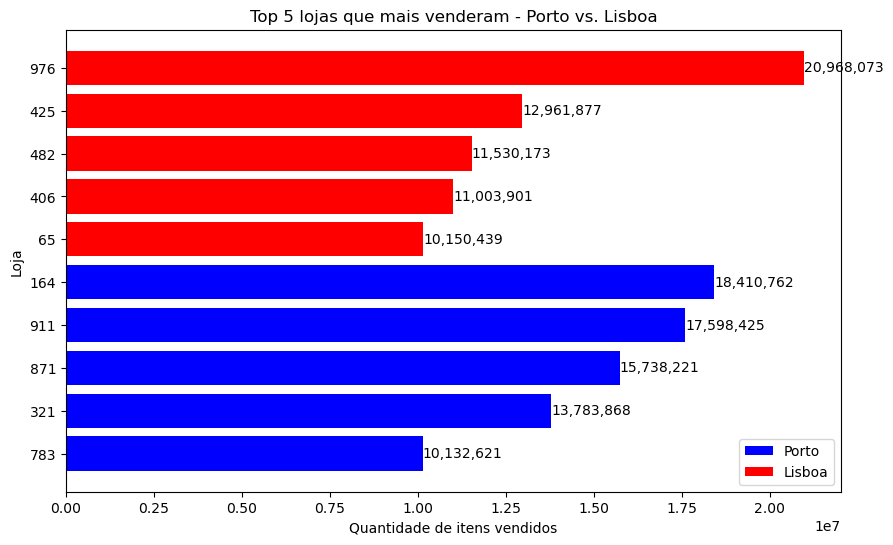

In [18]:
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais para Porto (azul)
plt.barh(top5_mais_vendas_porto['Loja'], top5_mais_vendas_porto['SUM(ITENS)'], color='blue', label='Porto')

# Gráfico de barras horizontais para Lisboa (vermelho)
plt.barh(top5_mais_vendas_lisboa['Loja'], top5_mais_vendas_lisboa['SUM(ITENS)'], color='red', label='Lisboa')

plt.title('Top 5 lojas que mais venderam - Porto vs. Lisboa')
plt.xlabel('Quantidade de itens vendidos')
plt.ylabel('Loja')

# Adicionar rótulos para Porto
for i, v in enumerate(top5_mais_vendas_porto['SUM(ITENS)']):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

# Adicionar rótulos para Lisboa
for i, v in enumerate(top5_mais_vendas_lisboa['SUM(ITENS)']):
    plt.text(v, i + len(top5_mais_vendas_lisboa), f'{v:,.0f}', color='black', va='center')


plt.legend()

plt.show()

#### A loja 976 de Lisboa vendeu mais do que qualquer outra loja do Porto.
#### A loja 164 foi a loja que mais vendeu no Porto.
#### As quatro lojas que mais venderam no Porto (164, 911, 871 e 321), venderam mais do que qualquer loja de Lisboa (à exceção da loja 976 de Lisboa).

### Top 5 lojas que menos venderam (itens) em cada cidade.

#### Porto

In [19]:
top5_menos_vendas_porto= df_porto.groupby(['Loja'])['SUM(ITENS)'].sum().sort_values(ascending=True).head(5)
top5_menos_vendas_porto= top5_menos_vendas_porto.reset_index()
top5_menos_vendas_porto['Loja'] = top5_menos_vendas_porto['Loja'].astype(str)
top5_menos_vendas_porto=top5_menos_vendas_porto.sort_values(by='SUM(ITENS)', ascending=False)
top5_menos_vendas_porto

,Loja,SUM(ITENS)
4,1069,970080
3,1443,871087
2,946,600841
1,1299,4288
0,1300,3544


#### Lisboa

In [20]:
top5_menos_vendas_lisboa = df_lisboa.groupby(['Loja'])['SUM(ITENS)'].sum().sort_values(ascending=True).head(5)
top5_menos_vendas_lisboa = top5_menos_vendas_lisboa.reset_index()
top5_menos_vendas_lisboa['Loja'] = top5_menos_vendas_lisboa['Loja'].astype(str)
top5_menos_vendas_lisboa=top5_menos_vendas_lisboa.sort_values(by='SUM(ITENS)', ascending=False)
top5_menos_vendas_lisboa

,Loja,SUM(ITENS)
4,1601,1127547
3,82,1120012
2,1581,967339
1,929,791943
0,200,583686


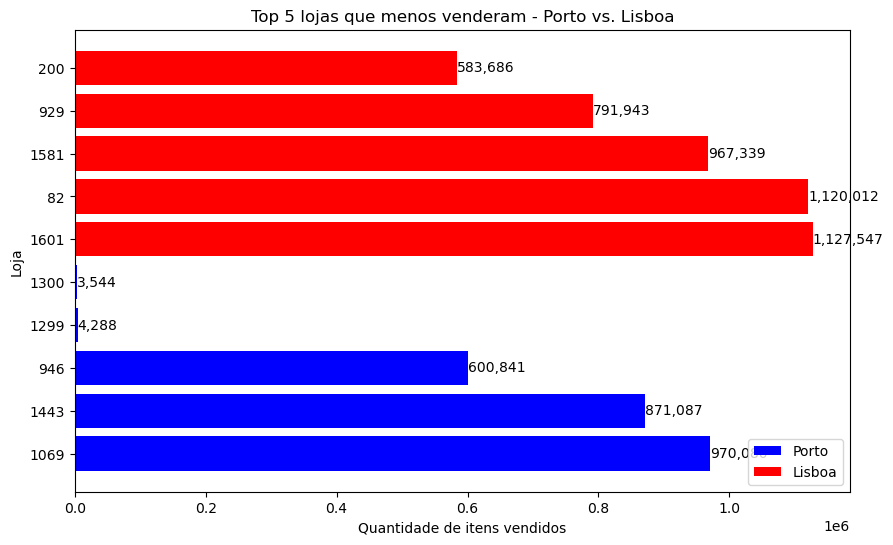

In [21]:
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais para Porto (azul)
plt.barh(top5_menos_vendas_porto['Loja'], top5_menos_vendas_porto['SUM(ITENS)'], color='blue', label='Porto')

# Gráfico de barras horizontais para Lisboa (vermelho)
plt.barh(top5_menos_vendas_lisboa['Loja'], top5_menos_vendas_lisboa['SUM(ITENS)'], color='red', label='Lisboa')

plt.title('Top 5 lojas que menos venderam - Porto vs. Lisboa')
plt.xlabel('Quantidade de itens vendidos')
plt.ylabel('Loja')

# Adicionar rótulos para Porto
for i, v in enumerate(top5_menos_vendas_porto['SUM(ITENS)']):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

# Adicionar rótulos para Lisboa
for i, v in enumerate(top5_menos_vendas_lisboa['SUM(ITENS)']):
    plt.text(v, i + len(top5_menos_vendas_lisboa), f'{v:,.0f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

#### A loja 200, foi a loja que menos vendeu em Lisboa.
#### As lojas 1299 e 1300 foram as lojas que menos venderam no Porto.
#### As lojas 1299 e 1300 do Porto venderam muito pouco, menos de 5000 itens (possivelmente estiveram em funcionamente durante um curto periodo de tempo comparativamente às restantes lojas (?))

### Top 5 de lojas que mais faturaram em cada cidade.

#### Porto

In [22]:
top5_mais_faturacao_porto = df_porto.groupby(['Loja'])['SUM(VALOR)'].sum().sort_values(ascending=False).head(5)
top5_mais_faturacao_porto = top5_mais_faturacao_porto.reset_index()
top5_mais_faturacao_porto['Loja'] = top5_mais_faturacao_porto['Loja'].astype(str)
top5_mais_faturacao_porto=top5_mais_faturacao_porto.sort_values(by='SUM(VALOR)', ascending=True)
top5_mais_faturacao_porto

,Loja,SUM(VALOR)
4,783,31425537.95
3,321,45517020.76
2,871,53879502.58
1,911,60261834.38
0,164,61988087.45


#### Lisboa

In [23]:
top5_mais_faturacao_lisboa = df_lisboa.groupby(['Loja'])['SUM(VALOR)'].sum().sort_values(ascending=False).head(5)
top5_mais_faturacao_lisboa = top5_mais_faturacao_lisboa.reset_index()
top5_mais_faturacao_lisboa['Loja'] = top5_mais_faturacao_lisboa['Loja'].astype(str)
top5_mais_faturacao_lisboa=top5_mais_faturacao_lisboa.sort_values(by='SUM(VALOR)', ascending=True)
top5_mais_faturacao_lisboa

,Loja,SUM(VALOR)
4,406,35231909.65
3,464,36130182.38
2,482,38516055.21
1,425,40952730.07
0,976,70447364.53


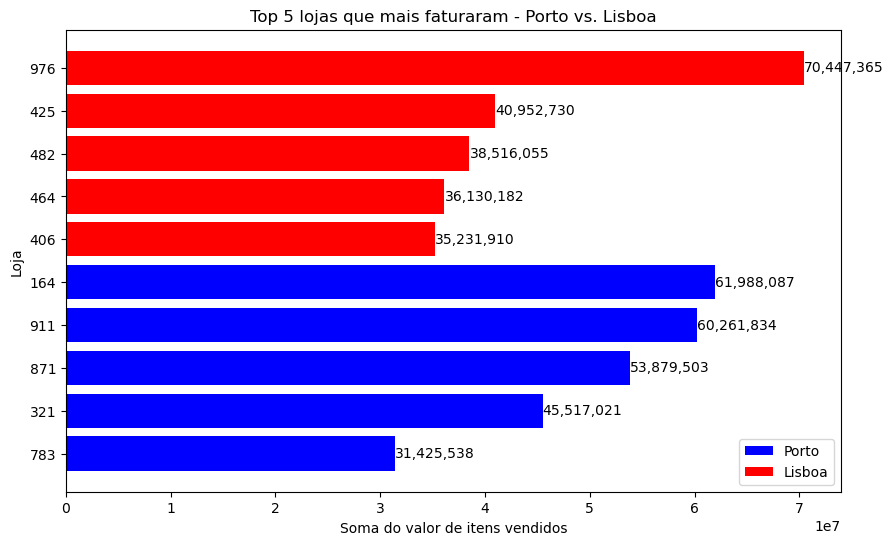

In [24]:
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais para Porto (azul)
plt.barh(top5_mais_faturacao_porto['Loja'], top5_mais_faturacao_porto['SUM(VALOR)'], color='blue', label='Porto')

# Gráfico de barras horizontais para Lisboa (vermelho)
plt.barh(top5_mais_faturacao_lisboa['Loja'], top5_mais_faturacao_lisboa['SUM(VALOR)'], color='red', label='Lisboa')

plt.title('Top 5 lojas que mais faturaram - Porto vs. Lisboa')
plt.xlabel('Soma do valor de itens vendidos')
plt.ylabel('Loja')

# Adicionar rótulos para Porto
for i, v in enumerate(top5_mais_faturacao_porto['SUM(VALOR)']):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

# Adicionar rótulos para Lisboa
for i, v in enumerate(top5_mais_faturacao_lisboa['SUM(VALOR)']):
    plt.text(v, i + len(top5_mais_faturacao_lisboa), f'{v:,.0f}', color='black', va='center')

plt.legend()

plt.show()

#### As lojas que mais faturaram são as mesmas lojas que mais itens venderam em ambas as cidades (comportamento semelhante em relação ao top5 de vendas).
#### A loja 976 de Lisboa faturou mais do que qualquer outra loja do Porto, mais de 70 milhões de euros.
#### A loja 164 foi a loja que mais vendeu no Porto, aproximadamente 62 milhões de euros.

### Top 5 de lojas que menos faturaram em cada cidade.

#### Porto

In [25]:
top5_menos_faturacao_porto = df_porto.groupby(['Loja'])['SUM(VALOR)'].sum().sort_values(ascending=True).head(5)
top5_menos_faturacao_porto = top5_menos_faturacao_porto.reset_index()
top5_menos_faturacao_porto['Loja'] = top5_menos_faturacao_porto['Loja'].astype(str)
top5_menos_faturacao_porto=top5_menos_faturacao_porto.sort_values(by='SUM(VALOR)', ascending=False)
top5_menos_faturacao_porto

,Loja,SUM(VALOR)
4,1069,1892810.04
3,1443,1638231.33
2,946,1014410.04
1,1299,4288.00
0,1300,3544.00


#### Lisboa

In [26]:
top5_menos_faturacao_lisboa = df_lisboa.groupby(['Loja'])['SUM(VALOR)'].sum().sort_values(ascending=True).head(5)
top5_menos_faturacao_lisboa = top5_menos_faturacao_lisboa.reset_index()
top5_menos_faturacao_lisboa['Loja'] = top5_menos_faturacao_lisboa['Loja'].astype(str)
top5_menos_faturacao_lisboa=top5_menos_faturacao_lisboa.sort_values(by='SUM(VALOR)', ascending=False)
top5_menos_faturacao_lisboa

,Loja,SUM(VALOR)
4,1601,2144201.66
3,82,2039274.03
2,1581,1912256.27
1,929,1322787.50
0,200,1013863.08


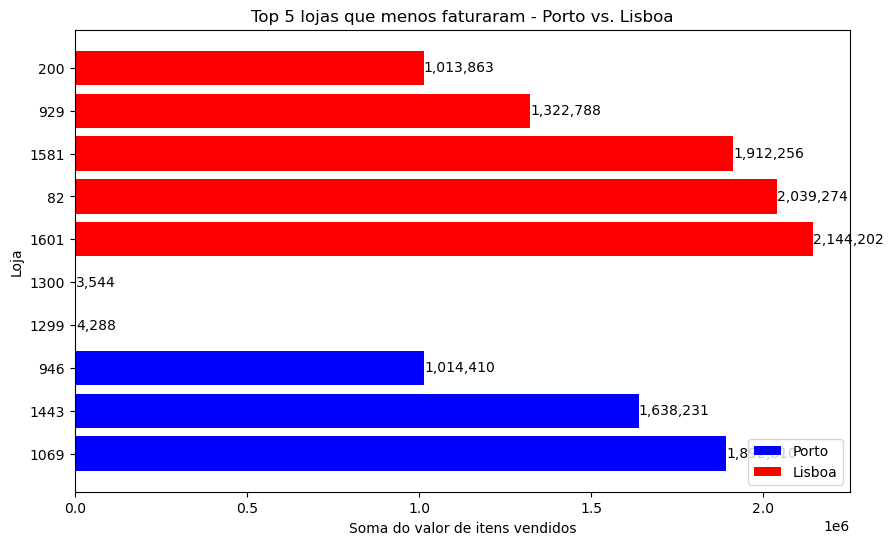

In [27]:
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais para Porto (azul)
plt.barh(top5_menos_faturacao_porto['Loja'], top5_menos_faturacao_porto['SUM(VALOR)'], color='blue', label='Porto')

# Gráfico de barras horizontais para Lisboa (vermelho)
plt.barh(top5_menos_faturacao_lisboa['Loja'], top5_menos_faturacao_lisboa['SUM(VALOR)'], color='red', label='Lisboa')

plt.title('Top 5 lojas que menos faturaram - Porto vs. Lisboa')
plt.xlabel('Soma do valor de itens vendidos')
plt.ylabel('Loja')

# Adicionar rótulos para Porto
for i, v in enumerate(top5_menos_faturacao_porto['SUM(VALOR)']):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

# Adicionar rótulos para Lisboa
for i, v in enumerate(top5_menos_faturacao_lisboa['SUM(VALOR)']):
    plt.text(v, i + len(top5_menos_faturacao_porto), f'{v:,.0f}', color='black', va='center')


plt.legend(loc='lower right')

plt.show()

#### As lojas que menos faturaram são as mesmas lojas que menos itens venderam, em ambas as cidades.
#### Nas duas cidades os valores de faturação para todas as lojas são iguais ou inferiores a aproximadamente 2 milhões de euros.
### ?? valor de faturação das lojas 1300 e 1299 é o mesmo do número de vendas (ver gráfico anterior: Top 5 lojas que menos venderam) ??

### Flutuação de vendas por mês em cada cidade.

In [28]:
df["date_month"] = df["DATA"].dt.month # novo coluna criada com o número do mês correspondente (variável numérica - inteiros).
df

,Loja,Cidade,DATA,SUM(ITENS),SUM(VALOR),date_month
0,261,Porto,2022-01-04,3438,6825.08,1
1,261,Porto,2022-01-19,3645,6614.07,1
2,261,Porto,2022-01-23,4432,8300.36,1
3,261,Porto,2022-01-28,3773,7316.09,1
4,261,Porto,2022-02-14,3861,7015.80,2
...,...,...,...,...,...,...
26176,1601,Lisboa,2022-10-17,3601,6106.24,10
26177,1601,Lisboa,2022-10-21,3865,7355.57,10
26178,1601,Lisboa,2022-11-23,3376,6558.53,11
26179,1601,Lisboa,2022-11-26,3506,7415.11,11


In [29]:
df["date_month"].dtypes

dtype('int32')

#### Porto

In [30]:
vendas_mes_porto=(df[df['Cidade'] == 'Porto']).groupby(['date_month'])['SUM(ITENS)'].sum()
vendas_mes_porto

date_month
1      9057204
2      9189972
3     10256442
4     10381141
5     10121937
6     10084067
7     11335253
8     11466387
9     11256913
10    11281549
11    10365788
12    12897828
Name: SUM(ITENS), dtype: int64

#### Lisboa

In [31]:
vendas_mes_lisboa=(df[df['Cidade'] == 'Lisboa']).groupby(['date_month'])['SUM(ITENS)'].sum()
vendas_mes_lisboa

date_month
1      7784505
2      8116768
3      8945227
4      9181896
5      8841583
6      8619446
7      9231338
8      9001405
9      8373663
10     8699757
11     7874390
12    10044794
Name: SUM(ITENS), dtype: int64

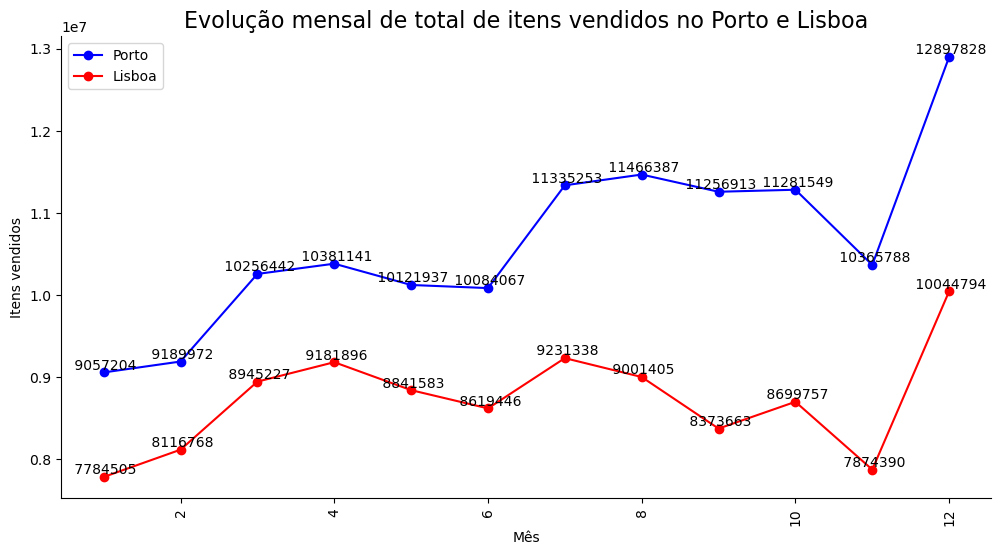

In [32]:
plt.figure(figsize=(12, 6))

# linha para Porto
plt.plot(vendas_mes_porto.index, vendas_mes_porto.values, '-o', color='blue', label='Porto')

# Adicionar rótulos nos pontos da linha de Porto
for i, v in enumerate(vendas_mes_porto.values):
    plt.text(vendas_mes_porto.index[i], v, f'{v: .0f}', color='black', ha='center', va='bottom')
    
# linha para Lisboa
plt.plot(vendas_mes_lisboa.index, vendas_mes_lisboa.values, '-o', color='red', label='Lisboa')

# Adicionar rótulos nos pontos da linha de Lisboa
for i, v in enumerate(vendas_mes_lisboa.values):
    plt.text(vendas_mes_lisboa.index[i], v, f'{v: .0f}', color='black', ha='center', va='bottom')

plt.title('Evolução mensal de total de itens vendidos no Porto e Lisboa', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Itens vendidos')
plt.xticks(rotation=90)
plt.legend()
sns.despine()

plt.show()

#### A cidade do Porto apresentou maior número de vendas durante todos os meses do ano.
#### Janeiro e Fevereiro foram os meses que apresentaram menores vendas nas duas cidades.
#### Dezembro apresentou o maior número de vendas em ambas as cidades.
#### Existe uma tendência crescente do volume de vendas ao longo do ano, à exceção do mês de novembro.
#### No mês de Novembro é possível observar uma quebra evidente de itens vendidos para ambas as cidades em relação a meses anteriores (no caso de Lisboa chega a valores muito próximos daqueles que foram obtidos em Janeiro).
#### Existe uma variação do número de itens vendidos entre Janeiro e Dezembro, próxima de 3,8 milhões e 2,2 mihões, respetivamente para Porto e Lisboa.
#### As duas cidades apresentaram o mesmo comportamento em relação à flutuação do número total de vendas.

### Flutuação de faturação por mês em cada cidade.

#### Porto

In [33]:
faturacao_mes_porto=(df[df['Cidade'] == 'Porto']).groupby(['date_month'])['SUM(VALOR)'].sum()
faturacao_mes_porto

date_month
1     25021119.23
2     26054971.15
3     28542083.08
4     31009458.22
5     29982099.54
6     30727145.16
7     36052777.94
8     35529064.22
9     34313390.85
10    34080680.20
11    33843057.29
12    50723108.36
Name: SUM(VALOR), dtype: float64

#### Lisboa

In [34]:
faturacao_mes_lisboa=(df[df['Cidade'] == 'Lisboa']).groupby(['date_month'])['SUM(VALOR)'].sum()
faturacao_mes_lisboa

date_month
1     21757263.65
2     23195997.65
3     25225016.91
4     27714163.62
5     26217720.57
6     26276805.90
7     29062168.16
8     27523795.11
9     25860885.29
10    26976081.96
11    26517233.07
12    41703864.81
Name: SUM(VALOR), dtype: float64

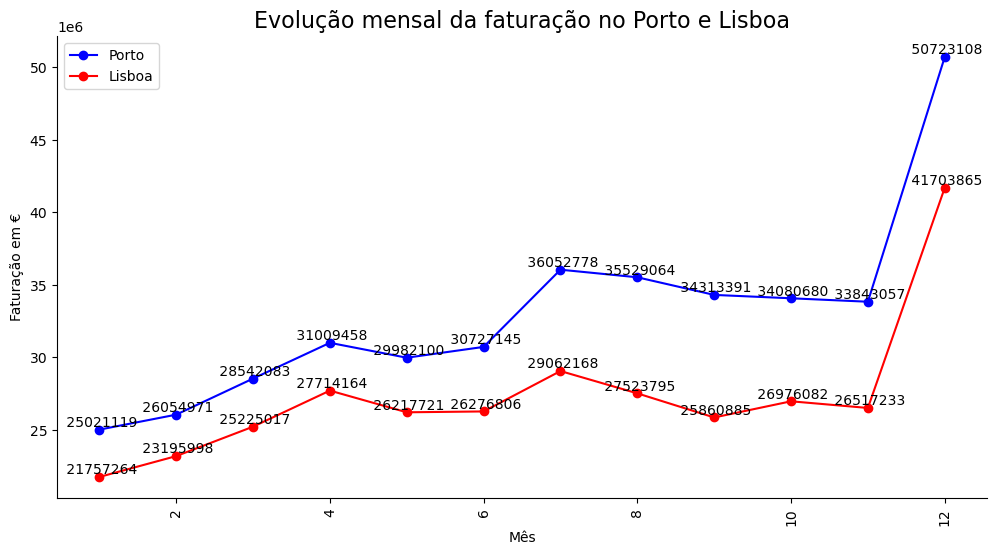

In [35]:
plt.figure(figsize=(12, 6))

# Linha para Porto
plt.plot(faturacao_mes_porto.index, faturacao_mes_porto.values, '-o', color='blue', label='Porto')

# Adicionar rótulos nos pontos da linha de Porto
for i, v in enumerate(faturacao_mes_porto.values):
    plt.text(faturacao_mes_porto.index[i], v, f'{v: .0f}', color='black', ha='center', va='bottom')

# linha para Lisboa
plt.plot(faturacao_mes_lisboa.index, faturacao_mes_lisboa.values, '-o', color='red', label='Lisboa')

# Adicionar rótulos nos pontos da linha de Lisboa
for i, v in enumerate(faturacao_mes_lisboa.values):
    plt.text(faturacao_mes_lisboa.index[i], v, f'{v: .0f}', color='black', ha='center', va='bottom')
    
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

plt.title('Evolução mensal da faturação no Porto e Lisboa', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Faturação em €')
plt.xticks(rotation=90)
plt.legend()
sns.despine()

plt.show()

#### A evolução mensal da faturação em ambas as cidades é muito semelhante ao comportamento evidenciado na evolução mensal de vendas de itens. 
#### O mês de Dezembro foi o mês que mais faturou nas duas cidades, aproximadamente 51 e 42 milhões de euros, respetivamente para Porto e Lisboa.
#### O mês de Dezembro faturou o dobro em relação ao mês de Janeiro, nas duas cidades.
#### No entanto, convém salientar, que apesar de ter havido uma quebra de vendas no mês de Novembro (ver gráfico anterior), o mesmo não se verificou em termos de faturação.
#### O valor de faturação do mês de Novembro é muito próximo em relação aos valores dos quatro meses anteriores (apesar de se terem verificado menos vendas de itens neste mês - ver gráfico anterior).

### Flutuação de vendas por semana em cada cidade.

In [36]:
df["date_week"] = df["DATA"].dt.isocalendar().week # novo coluna criada com o número da semana correspondente (variável numérica - inteiros).
df

,Loja,Cidade,DATA,SUM(ITENS),SUM(VALOR),date_month,date_week
0,261,Porto,2022-01-04,3438,6825.08,1,1
1,261,Porto,2022-01-19,3645,6614.07,1,3
2,261,Porto,2022-01-23,4432,8300.36,1,3
3,261,Porto,2022-01-28,3773,7316.09,1,4
4,261,Porto,2022-02-14,3861,7015.80,2,7
...,...,...,...,...,...,...,...
26176,1601,Lisboa,2022-10-17,3601,6106.24,10,42
26177,1601,Lisboa,2022-10-21,3865,7355.57,10,42
26178,1601,Lisboa,2022-11-23,3376,6558.53,11,47
26179,1601,Lisboa,2022-11-26,3506,7415.11,11,47


In [37]:
df["date_week"].dtypes

UInt32Dtype()

#### Porto

In [38]:
vendas_semana_porto=(df[df['Cidade'] == 'Porto']).groupby(['date_week'])['SUM(ITENS)'].sum()
vendas_semana_porto.head(10)

date_week
1     2360415
2     2352314
3     2421071
4     1559326
5     1938011
6     2263544
7     2238206
8     2368286
9     2580993
10    2505859
Name: SUM(ITENS), dtype: int64

#### Lisboa

In [39]:
vendas_semana_lisboa=(df[df['Cidade'] == 'Lisboa']).groupby(['date_week'])['SUM(ITENS)'].sum()
vendas_semana_lisboa.head(10)

date_week
1     2033917
2     2003650
3     2084490
4     1352273
5     1698610
6     1994701
7     1987713
8     2104363
9     2247177
10    2233087
Name: SUM(ITENS), dtype: int64

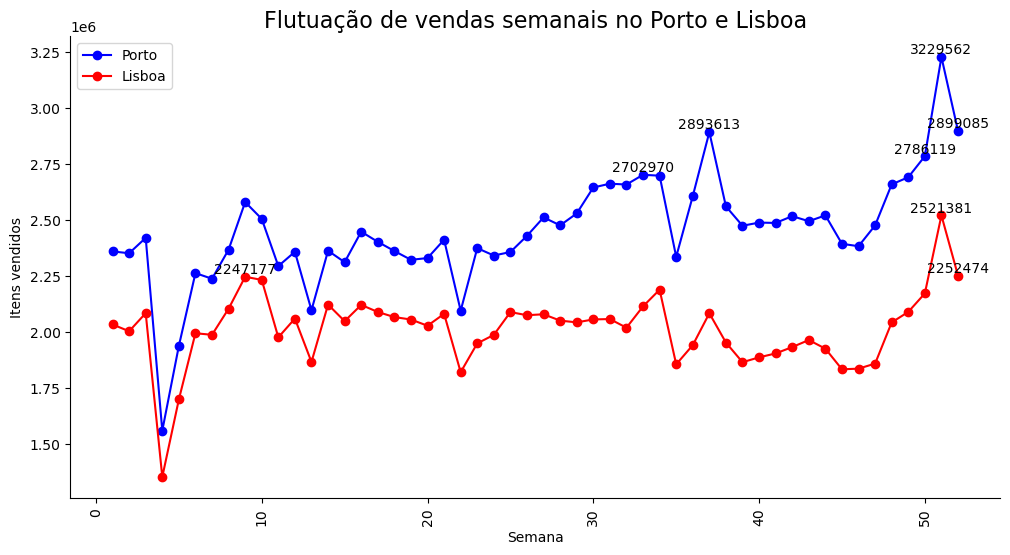

In [40]:
plt.figure(figsize=(12, 6))

# linha para Porto
plt.plot(vendas_semana_porto.index, vendas_semana_porto.values, '-o', color='blue', label='Porto')

# Ordenar os índices com base nos valores
sorted_indices_porto = sorted(range(len(vendas_semana_porto.values)), key=lambda k: vendas_semana_porto.values[k], reverse=True)

# Adicionar rótulos nos 5 maiores picos da linha de Porto
for i in sorted_indices_porto[:5]:
    plt.text(vendas_semana_porto.index[i], vendas_semana_porto.values[i], f'{vendas_semana_porto.values[i]:.0f}', color='black', ha='center', va='bottom')


# linha para Lisboa
plt.plot(vendas_semana_lisboa.index, vendas_semana_lisboa.values, '-o', color='red', label='Lisboa')

# Ordenar os índices com base nos valores
sorted_indices_lisboa = sorted(range(len(vendas_semana_lisboa.values)), key=lambda k: vendas_semana_lisboa.values[k], reverse=True)

# Adicionar rótulos nos 3 maiores picos da linha de Lisboa
for i in sorted_indices_lisboa[:3]:
    plt.text(vendas_semana_lisboa.index[i], vendas_semana_lisboa.values[i], f'{vendas_semana_lisboa.values[i]:.0f}', color='black', ha='center', va='bottom')

plt.title('Flutuação de vendas semanais no Porto e Lisboa', fontsize=16)
plt.xlabel('Semana')
plt.ylabel('Itens vendidos')
plt.xticks(rotation=90)
plt.legend()
sns.despine()

plt.show()

#### Existe um pico positivo máximo de vendas na semana de Natal em ambas as cidades.
#### No sentido inverso, é possível observar um pico negativo de vendas no final do mês de Janeiro.
#### É também possível constatar que na última semana de Março, primeira semana de Junho, primeira semana de Setembro verificam-se decréscimos significativos no número de itens vendidos. 

### Flutuação da faturação por semana em cada cidade.

#### Porto

In [41]:
faturacao_semana_porto=(df[df['Cidade'] == 'Porto']).groupby(['date_week'])['SUM(VALOR)'].sum()
faturacao_semana_porto.head(10)

date_week
1     6949304.95
2     6487463.72
3     6375207.51
4     4098119.77
5     5597716.62
6     6464930.26
7     6311531.61
8     6685808.41
9     7190053.95
10    6974455.14
Name: SUM(VALOR), dtype: float64

#### Lisboa

In [42]:
faturacao_semana_lisboa=(df[df['Cidade'] == 'Lisboa']).groupby('date_week')['SUM(VALOR)'].sum()
faturacao_semana_lisboa.head(10)

date_week
1     6025644.71
2     5608973.50
3     5596941.90
4     3579846.15
5     4969617.34
6     5698419.88
7     5674271.76
8     5996399.67
9     6329379.80
10    6316945.65
Name: SUM(VALOR), dtype: float64

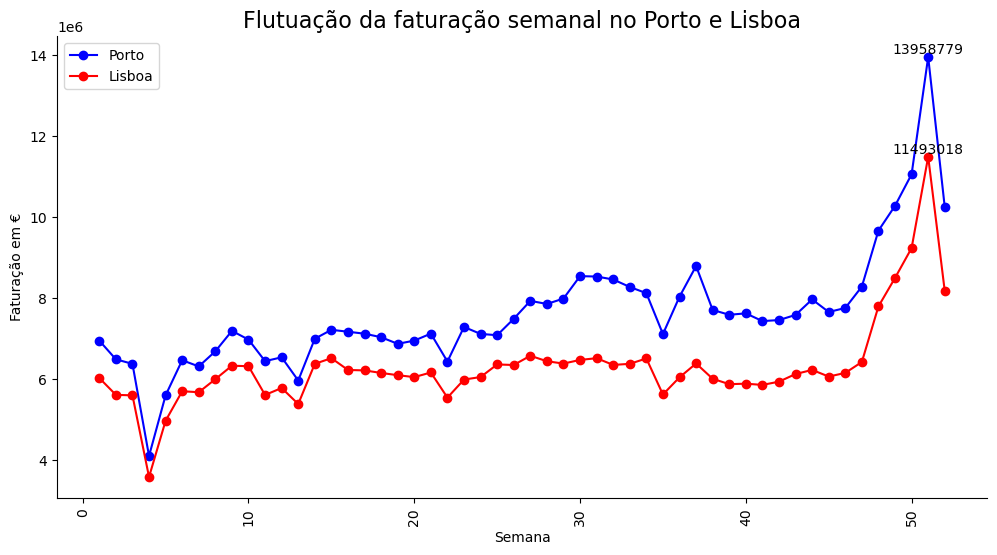

In [43]:
plt.figure(figsize=(12, 6))

# Linha para Porto
plt.plot(faturacao_semana_porto.index, faturacao_semana_porto.values, '-o', color='blue', label='Porto')

# Ordenar os índices com base nos valores
sorted_indices_porto = sorted(range(len(faturacao_semana_porto.values)), key=lambda k: faturacao_semana_porto.values[k], reverse=True)

# Adicionar rótulo nos maior picos da linha de Porto
for i in sorted_indices_porto[:1]:
    plt.text(faturacao_semana_porto.index[i], faturacao_semana_porto.values[i], f'{faturacao_semana_porto.values[i]:.0f}', color='black', ha='center', va='bottom')
    
# Linha para Lisboa
plt.plot(faturacao_semana_lisboa.index, faturacao_semana_lisboa.values, '-o', color='red', label='Lisboa')

# Adicionar rótulo no maior pico da linha de Lisboa
for i in sorted_indices_lisboa[:1]:
    plt.text(faturacao_semana_lisboa.index[i], faturacao_semana_lisboa.values[i], f'{faturacao_semana_lisboa.values[i]:.0f}', color='black', ha='center', va='bottom')

plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

plt.title('Flutuação da faturação semanal no Porto e Lisboa', fontsize=16)
plt.xlabel('Semana')
plt.ylabel('Faturação em €')
plt.xticks(rotation=90)
plt.legend()
sns.despine()

plt.show()

#### Comportamento bastante semelhante aquele evidenciado na flutuação de vendas semanais nas duas cidades (gráfico anterior).
#### Porto e Lisboa apresentaram valores máximos de faturação semanal no Natal, aproximadamente 14 e 11,5 milhões de euros, respetivamente.

### Top 15 dias com maior faturação em cada cidade.

In [44]:
# retirar a hora da data
df_porto['DATA_sem_hora'] = df_porto['DATA'].dt.date

#### Porto

In [45]:
top15_dias_mais_faturacao_porto= df_porto.groupby(['DATA_sem_hora'])['SUM(VALOR)'].sum().sort_values(ascending=False).head(15)
top15_dias_mais_faturacao_porto=top15_dias_mais_faturacao_porto.sort_values(ascending=True)
top15_dias_mais_faturacao_porto

DATA_sem_hora
2022-12-11    1663430.06
2022-12-03    1675549.33
2022-12-10    1678003.26
2022-12-01    1713917.34
2022-12-08    1772458.97
2022-12-31    1831917.28
2022-12-24    1883149.48
2022-12-19    1924150.19
2022-12-20    2001664.13
2022-12-18    2009956.67
2022-12-17    2135437.39
2022-12-21    2274610.04
2022-12-30    2336935.50
2022-12-22    2561771.10
2022-12-23    3313433.95
Name: SUM(VALOR), dtype: float64

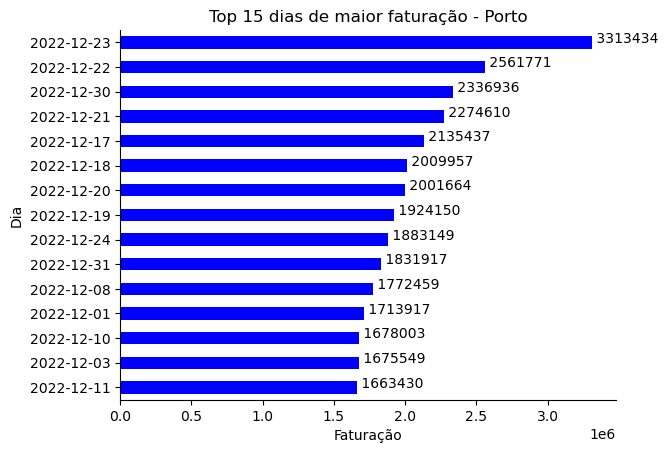

In [46]:
top15_dias_mais_faturacao_porto.plot(kind='barh', color='Blue')
plt.title('Top 15 dias de maior faturação - Porto')
plt.xlabel('Faturação')
for i, v in enumerate(top15_dias_mais_faturacao_porto):
    plt.text(v, i, f'{v: .0f}', color='black')
plt.ylabel('Dia')
sns.despine()
plt.show()

#### No Porto os quinze dias com maior volume de faturação foram todos durante o mês de Dezembro, especialmente nos dias anteriores ao Natal e passagem de ano.
#### Os valores estão todos compreendidos entre 165 mil e aproximadamente 332 mil euros.

#### Lisboa

In [47]:
# retirar a hora da data
df_lisboa['DATA_sem_hora'] = df_lisboa['DATA'].dt.date

In [48]:
top15_dias_mais_faturacao_lisboa= df_lisboa.groupby(['DATA_sem_hora'])['SUM(VALOR)'].sum().sort_values(ascending=False).head(15)
top15_dias_mais_faturacao_lisboa=top15_dias_mais_faturacao_lisboa.sort_values(ascending=True)
top15_dias_mais_faturacao_lisboa

DATA_sem_hora
2022-10-22    1408828.24
2022-12-11    1434972.97
2022-12-01    1443432.19
2022-12-03    1450158.16
2022-12-08    1544636.63
2022-12-31    1564183.18
2022-12-24    1565941.25
2022-12-19    1579060.91
2022-12-20    1688956.88
2022-12-18    1731237.43
2022-12-21    1856729.51
2022-12-30    1903290.65
2022-12-17    1921047.91
2022-12-22    2079118.31
2022-12-23    2723210.81
Name: SUM(VALOR), dtype: float64

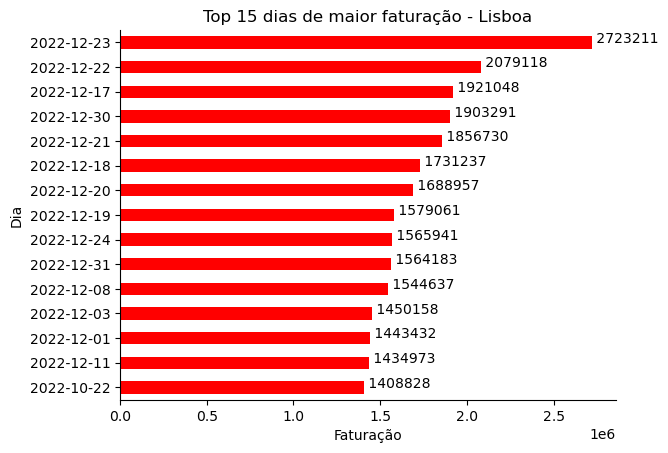

In [49]:
top15_dias_mais_faturacao_lisboa.plot(kind='barh', color='red')
plt.title('Top 15 dias de maior faturação - Lisboa')
plt.xlabel('Faturação')
for i, v in enumerate(top15_dias_mais_faturacao_lisboa):
    plt.text(v, i, f'{v: .0f}', color='black')
plt.ylabel('Dia')
sns.despine()
plt.show()

#### Lisboa apresentou comportamento muito semelhante à cidade do Porto (top 15 dias de maior faturação todos em Dezembro).
#### De salientar que o terceiro dia que mais faturou em Lisboa foi o sábado anterior ao Natal (no Porto foi o dia 30, anterior à véspera de passagem de ano).
#### Os valores estão todos compreendidos entre 140 mil e aproximadamente 273 mil euros (intervalo com mínimo e máximo menor em relação ao Porto, respetivamente).

### Top 15 dias com maior faturação em cada cidade (sem considerar Dezembro).

#### Porto

In [50]:
# retirar a hora da data
df['DATA_sem_hora'] = df['DATA'].dt.date

In [51]:
top15_dias_mais_faturacao_porto_2= (df[(df['Cidade'] == 'Porto') & (df['date_month'] != 12)]).groupby(['DATA_sem_hora'])['SUM(VALOR)'].sum().sort_values(ascending=False).head(15)
top15_dias_mais_faturacao_porto_2=top15_dias_mais_faturacao_porto_2.sort_values(ascending=True)
top15_dias_mais_faturacao_porto_2

DATA_sem_hora
2022-05-21    1430379.08
2022-08-06    1441293.52
2022-07-23    1448741.56
2022-11-12    1455047.58
2022-09-24    1462845.80
2022-07-09    1463248.12
2022-04-30    1467078.82
2022-09-18    1491974.50
2022-10-01    1523092.82
2022-07-30    1523213.78
2022-11-19    1541942.02
2022-09-17    1571143.33
2022-10-29    1581536.82
2022-10-22    1584538.53
2022-11-26    1618082.95
Name: SUM(VALOR), dtype: float64

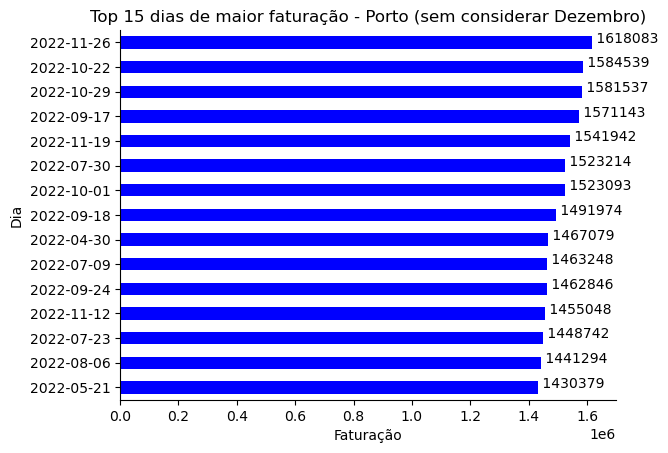

In [52]:
top15_dias_mais_faturacao_porto_2.plot(kind='barh', color='Blue')
plt.title('Top 15 dias de maior faturação - Porto (sem considerar Dezembro)')
plt.xlabel('Faturação')
for i, v in enumerate(top15_dias_mais_faturacao_porto_2):
    plt.text(v, i, f'{v: .0f}', color='black')
plt.ylabel('Dia')
sns.despine()
plt.show()

#### Mesmo não considerando o mês de Dezembro, a grande maioria dos dias de maior faturação estão inseridos no segundo semestre do ano (à exceção de 30 de Abril e 21 de Maio).
#### Os valores estão todos compreendidos entre 143 mil e aproximadamente 162 mil euros.

#### Lisboa

In [53]:
top15_dias_mais_faturacao_lisboa_2= (df[(df['Cidade'] == 'Lisboa') & (df['date_month'] != 12)]).groupby(['DATA_sem_hora'])['SUM(VALOR)'].sum().sort_values(ascending=False).head(15)
top15_dias_mais_faturacao_lisboa_2=top15_dias_mais_faturacao_lisboa_2.sort_values(ascending=True)
top15_dias_mais_faturacao_lisboa_2

DATA_sem_hora
2022-04-15    1256304.28
2022-10-01    1287292.26
2022-09-24    1296257.35
2022-04-16    1300561.92
2022-07-09    1301692.90
2022-04-30    1330650.94
2022-05-21    1335219.85
2022-04-23    1336696.39
2022-04-02    1346244.09
2022-11-19    1354179.51
2022-04-09    1370260.56
2022-10-29    1370707.07
2022-11-26    1383005.70
2022-03-12    1390735.98
2022-10-22    1408828.24
Name: SUM(VALOR), dtype: float64

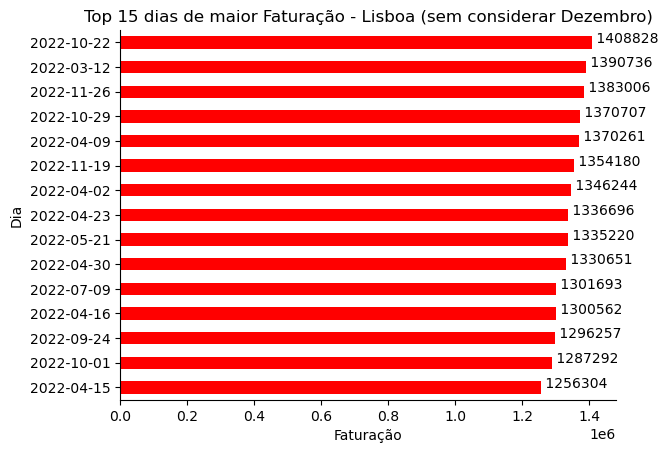

In [54]:
top15_dias_mais_faturacao_lisboa_2.plot(kind='barh', color='red')
plt.title('Top 15 dias de maior Faturação - Lisboa (sem considerar Dezembro)')
plt.xlabel('Faturação')
for i, v in enumerate(top15_dias_mais_faturacao_lisboa_2):
    plt.text(v, i, f'{v: .0f}', color='black')
plt.ylabel('Dia')
sns.despine()
plt.show()

#### Lisboa apresentou comportamento algo diferente em relação à cidade do Porto, já que os dias de maiores vendas (sem contar com Dezembro) estão distribuidos nos dois semestres do ano (quase metade/metade).
#### O mês de Abril está bastante representado neste top (cinco ocorrências).
#### Os valores estão todos compreendidos entre 125 mil e aproximadamente 140 mil euros (intervalo com mínimo e máximo menor em relação ao Porto, respetivamente).
#### Mais de metade dos dias (oito dias) são comuns nas duas cidades (22-10-22; 22-10-29; 22-11-19; 22-05-21; 22-04-30; 22-07-09, 22-09-24; 22-10-01).

### Top 15 dias com menor faturação em cada cidade.

#### Porto

In [55]:
top15_dias_menos_faturacao_porto= df_porto.groupby(['DATA_sem_hora'])['SUM(VALOR)'].sum().sort_values(ascending=True).head(15)
top15_dias_menos_faturacao_porto=top15_dias_menos_faturacao_porto.sort_values(ascending=False)
top15_dias_menos_faturacao_porto

DATA_sem_hora
2022-10-27    784871.32
2022-02-16    782600.22
2022-02-22    782480.45
2022-01-24    782056.23
2022-03-29    775360.38
2022-01-12    772410.57
2022-01-27    770497.40
2022-01-17    767311.67
2022-02-17    764012.98
2022-01-20    761558.89
2022-01-18    759124.66
2022-01-25    754155.08
2022-01-19    747596.22
2022-02-15    714183.24
2022-04-17    309166.92
Name: SUM(VALOR), dtype: float64

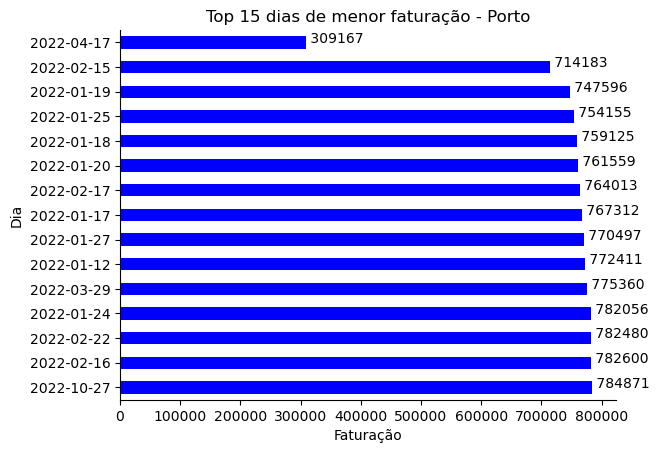

In [56]:
top15_dias_menos_faturacao_porto.plot(kind='barh', color='Blue')
plt.title('Top 15 dias de menor faturação - Porto')
plt.xlabel('Faturação')
for i, v in enumerate(top15_dias_menos_faturacao_porto):
    plt.text(v, i, f'{v: .0f}', color='black')
plt.ylabel('Dia')
sns.despine()
plt.show()

#### Os dias de menor faturação do Porto apresentaram valores inferiores a aproximadamente 785 mil euros.
#### Praticamente todos os dias de menor faturação são do primeiro semestre do ano (à exceção do dia 27 de Outubro).
#### O dia de menor faturação no Porto foi o dia 17 de Abril com valores próximos de matade dos restantes dias deste top.


#### Lisboa

In [57]:
top15_dias_menos_faturacao_lisboa= df_lisboa.groupby(['DATA_sem_hora'])['SUM(VALOR)'].sum().sort_values(ascending=True).head(15)
top15_dias_menos_faturacao_lisboa=top15_dias_menos_faturacao_lisboa.sort_values(ascending=False)
top15_dias_menos_faturacao_lisboa

DATA_sem_hora
2022-09-27    663659.17
2022-10-12    660539.42
2022-03-29    659760.31
2022-10-06    658517.19
2022-11-02    654765.21
2022-01-17    651710.35
2022-10-17    648572.35
2022-10-19    645263.92
2022-01-18    639159.40
2022-01-19    634360.28
2022-02-15    623138.02
2022-09-20    621149.03
2022-11-23    607452.24
2022-10-18    606156.85
2022-04-17    277010.59
Name: SUM(VALOR), dtype: float64

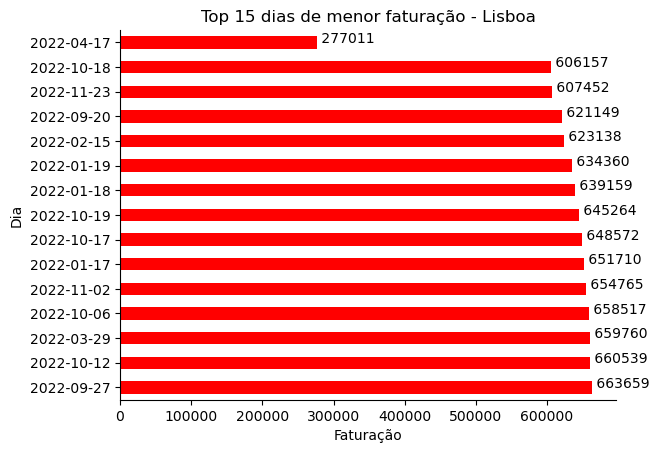

In [58]:
top15_dias_menos_faturacao_lisboa.plot(kind='barh', color='red')
plt.title('Top 15 dias de menor faturação - Lisboa')
plt.xlabel('Faturação')
for i, v in enumerate(top15_dias_menos_faturacao_lisboa):
    plt.text(v, i, f'{v: .0f}', color='black')
plt.ylabel('Dia')
sns.despine()
plt.show()

#### Os dias de menor faturação de Lisboa apresentaram valores inferiores a aproximadamente 664 mil euros.
#### Ao contrário do Porto, os dias de menor faturação de Lisboa estão distribuidos ao longo dos dois semestres.
#### Tal como no Porto, o dia de menor faturação em Lisboa foi o dia 17 de Abril com valores próximos de metade em relação aos restantes dias deste top (lojas funcionaram apenas durante meio periodo neste dia (?)).

### Outliers

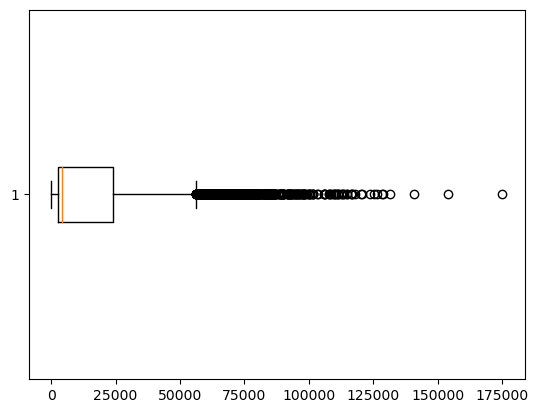

In [59]:
plt.boxplot(df["SUM(ITENS)"],vert= False)
plt.show()


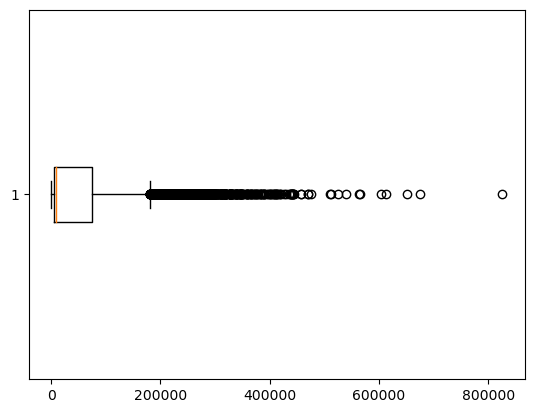

In [60]:
plt.boxplot(df["SUM(VALOR)"],vert= False)
plt.show()

#### Os valores identificados como outliers em relação aos itens vendidos e valores de faturação representam situações em que as vendas foram significativamente superiores à média. Neste contexto específico, tratá-los como outliers atípicos pode não ser a abordagem mais apropriada, pois esses pontos correspondem a dias excepcionais de elevado volume de vendas e de faturação. Em vez de considerá-los como dados discrepantes que devem ser ajustados ou removidos, é mais relevante interpretá-los e considera-los na análise.

# 2. Verificar através de testes de hipóteses (z e t) se as vendas médias por dia da loja 616 foram superiores a 34.000€.

#### Nível de significância: α = 5%.
#### Teste para uma amostra.
#### Hipóteses:
#### H0 = As vendas médias por dia da loja 616 <= 34.000€.
#### H1 = As vendas médias por dia da loja 616 > a 34.000€.

## 2.1. Teste Z (considerando as fórmulas dos slides das aulas).

In [61]:
df_loja_616=df[df['Loja'] == 616] # filtrar os dados apenas para a loja 616.

In [62]:
df_loja_616.describe() # para confirmar se o cálculo da média e desvio padrão de 'SUM(VALOR)' estarão corretos.

,Loja,DATA,SUM(ITENS),SUM(VALOR),date_month,date_week
count,357.0,357,357.000000,357.000000,357.000000,357.0
mean,616.0,2022-07-03 11:37:48.907563264,11883.120448,33340.280924,6.582633,26.644258
min,616.0,2022-01-02 00:00:00,4290.000000,12611.920000,1.000000,1.0
25%,616.0,2022-04-05 00:00:00,10051.000000,27314.790000,4.000000,14.0
50%,616.0,2022-07-04 00:00:00,11615.000000,31521.990000,7.000000,27.0
75%,616.0,2022-10-02 00:00:00,13151.000000,36457.570000,10.000000,40.0
max,616.0,2022-12-31 00:00:00,24634.000000,105422.570000,12.000000,52.0
std,0.0,NaN,2448.823870,9405.191712,3.422009,14.956287


#### Calculo da média (X)

In [63]:
loja_616_value_sales_mean = df_loja_616.groupby(['DATA', 'SUM(VALOR)'])['SUM(VALOR)'].sum().mean() # valor da média 'SUM(VALOR)' está de acordo com o valor obtido através do método 'describe()'.
loja_616_value_sales_mean

33340.28092436975

#### Calculo do devio padrão (σ)

In [64]:
desvio_padrao_616 = sta.stdev(df_loja_616['SUM(VALOR)']) # valor do desvio de 'SUM(VALOR)' está de acordo com o valor obtido através do método 'describe()'.
desvio_padrao_616

9405.191712378053

#### Cálculo da população (n)

In [65]:
n_loja_616= len(df_loja_616) 
n_loja_616

357

#### Determinar Z

In [66]:
z = ((loja_616_value_sales_mean)-(34000))/(desvio_padrao_616 / np.sqrt(n_loja_616)) # cálculo do z-score

In [67]:
z # apesar do valor obtido de 'z' neste exercício ser negativo, devemos considerar o seu valor em módulo (positivo) para determinar o p-value, uma vez que: 'z' representa apenas a distância relativa de um ponto de dados à média em termos de desvios padrão. O Z-score pode ser positivo ou negativo, dependendo se está acima ou abaixo da média, respectivamente.

-1.3253344818270176

#### Determinar 'pvalue' a partir de 'Z'.

In [68]:
p_value = (1-0.9082) # 0.9082 é retirado da tabela de distribuições a partir do valor do z-score obtido.
p_value

0.09179999999999999

## 2.2. Teste T com uma amostra (feito em Python).

In [69]:
# utilizamos o 'ttest_1samp' para realizar um teste t para uma amostra.

teste_t = stats.ttest_1samp(df_loja_616['SUM(VALOR)'], 34000, alternative='greater') # o parâmetro "alternative='greater'" é utilizado em testes de hipóteses para amostras únicas quando se está interessado em verificar se a média da amostra é significativamente maior do que um determinado valor (neste caso 34000).

statistic = teste_t.statistic 
p_value_unicaudal = teste_t.pvalue 

α = 0.05 # definimos o nível de significância de 0.05.

rejeitar_h_nula = p_value_unicaudal < α # verificamos se o valor de 'p' é menor que 'α' para decidir se rejeitamos (ou não) a hipótese nula(H0).

print("Estatística de teste (t):", statistic)
print("p-value (unicaudal - 'one-tailed'):", p_value_unicaudal) # Unicaudal (one-tailed): Refere-se a testes de hipóteses em que o objetivo é detetar diferenças numa única direção (superior ou inferior). Por exemplo: testar se a média é maior que um valor específico ou menor que um valor específico.
print('Rejeitamos a hipótese nula ?:', rejeitar_h_nula)

Estatística de teste (t): -1.3253344818270176
p-value (unicaudal - 'one-tailed'): 0.9070449217600189
Rejeitamos a hipótese nula ?: False


## 2.3. Conclusão:


#### α = 5%; p_value = 91%.
### α < p_value => Então, NÃO rejeitamos H0 e => As vendas médias por dia da loja 616 são <= 34.000€.
#### Em ambos os testes efetuados (z e t), NÃO é possível rejeitar H0 com um nível de significância de 5% (α < p_value). NÃO existem evidências suficientes para afirmar que: "com um grau de confiança de 95% as vendas médias por dia da loja 616 são superiores a 34.000€".